In [26]:
import re
import pandas as pd
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Data visualization and insight

In [28]:
# path clean
energy_clean = pd.read_csv('../data/processed/energy_clean.csv')

In [44]:
energy_clean['year_month'] = pd.to_datetime(energy_clean['year_month'])

# Extract year, month, and day
energy_clean['year'] = energy_clean['year_month'].dt.year  
energy_clean['month'] = energy_clean['year_month'].dt.month  
energy_clean['day'] = energy_clean['year_month'].dt.day  

In [45]:
energy_clean.columns

Index(['borough', 'account_name', 'serial_number', 'funding_origin',
       'total_bill', 'kwh_consumption', 'kwh_bill', 'kw_consumption',
       'kw_bill', 'year_month', 'start_date', 'end_date', 'year', 'month',
       'day'],
      dtype='object')

### Plot 1: Plot a line graph of kWh (kilowatt-hour) usage against billing dates

In [48]:
energy_ymth_kwh = (energy_clean
    .groupby(['year'])['kwh_consumption'].sum()
    .reset_index())

In [49]:
energy_ymth_kwh

,year,kwh_consumption
0,2010,1.305708e+09
1,2012,1.279641e+09
2,2013,1.260168e+09
3,2014,1.222798e+09
4,2015,1.244408e+09
5,2016,1.258397e+09
6,2017,1.144946e+09
7,2019,1.093849e+09
8,2020,1.542184e+09
9,2021,1.346118e+09


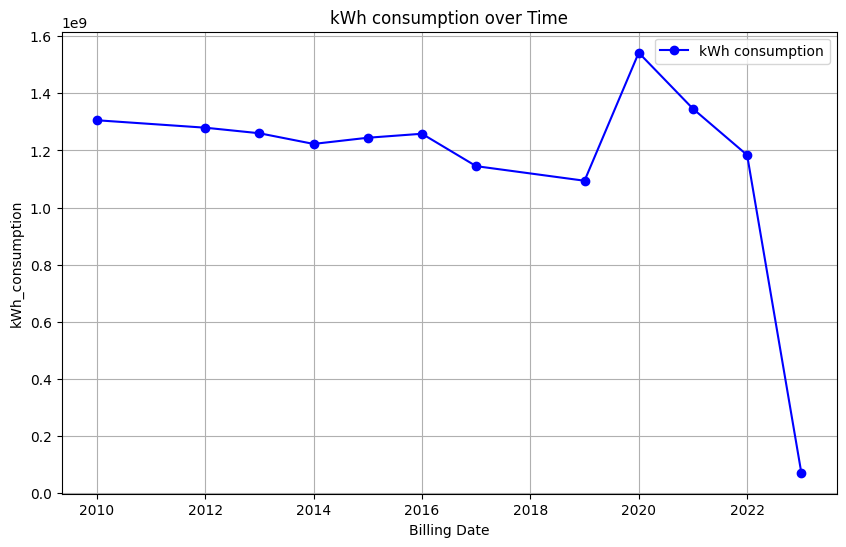

In [51]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(energy_ymth_kwh['year'], energy_ymth_kwh['kwh_consumption'], marker='o', linestyle='-', color='b', label='kWh consumption')

plt.title('kWh consumption over Time')
plt.xlabel('Billing Date')
plt.ylabel('kWh_consumption')
plt.grid(True)
plt.legend()
plt.show()

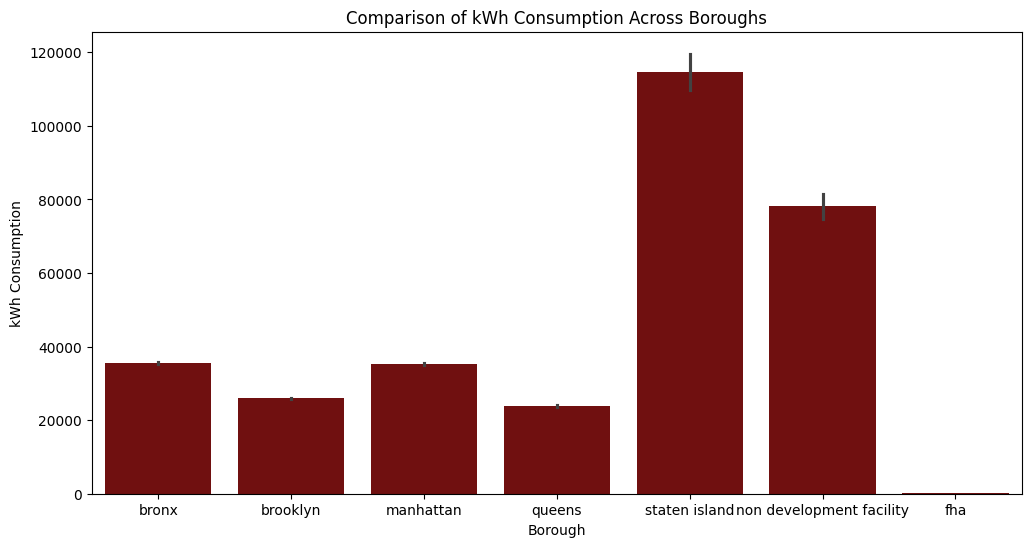

In [53]:


# Plotting the corrected bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(
    x='borough', 
    y='kwh_consumption', 
    data= energy_clean,  # Corrected DataFrame
    color='maroon'  # Optional: Set bar color
)

# Labeling the axes and providing a title
plt.xlabel("Borough")
plt.ylabel("kWh Consumption")  # Corrected typo
plt.title("Comparison of kWh Consumption Across Boroughs")

# Display the plot
plt.show()  # This should render the bar chart without errors


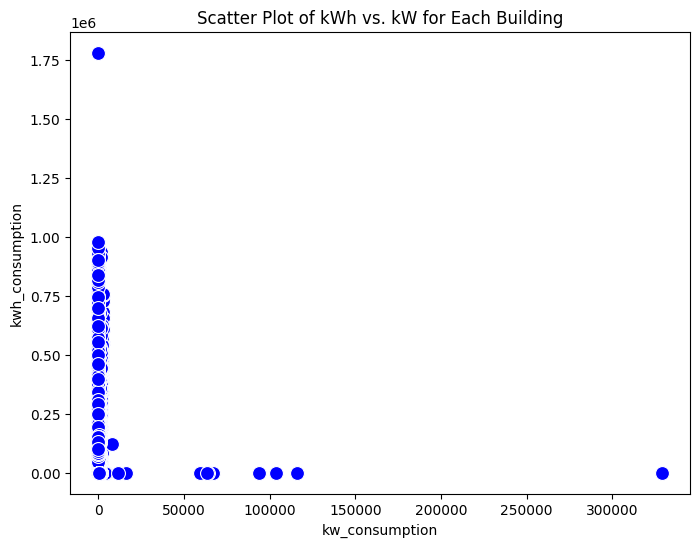

In [54]:
# Create a scatter plot of kW_consumption vs. kWh_consumption
plt.figure(figsize=(8, 6))  # Set plot size
sns.scatterplot( x='kw_consumption',
                 y='kwh_consumption',
                 data= energy_clean,
                 color='b', s=100)  # Scatter plot with blue dots and larger size

# Set axis labels and plot title
plt.xlabel("kw_consumption")
plt.ylabel("kwh_consumption")
plt.title("Scatter Plot of kWh vs. kW for Each Building")

# Display the plot
plt.show()
